In [1]:
import pandas as pd

In [2]:
nodes = pd.read_csv("https://yeatmanlab.github.io/AFQBrowser-demo/data/nodes.csv")

In [28]:
gb = nodes.groupby(["tractID", "subjectID", "nodeID"])

In [29]:
fa = gb["fa"]

In [30]:
import matplotlib.pyplot as plt

In [39]:
import numpy as np

In [46]:
fa.mean()

tractID                 subjectID    nodeID
Callosum Forceps Major  subject_000  0         0.213573
                                     1         0.289814
                                     2         0.340877
                                     3         0.371039
                                     4         0.379193
                                                 ...   
Right Uncinate          subject_076  95        0.291500
                                     96        0.282572
                                     97        0.270498
                                     98        0.228468
                                     99        0.177931
Name: fa, Length: 154000, dtype: float64

In [41]:
arr = np.array(fa.mean())

154000

In [48]:
arr = arr.reshape((77, 2000))

In [49]:
arr.shape

(77, 2000)

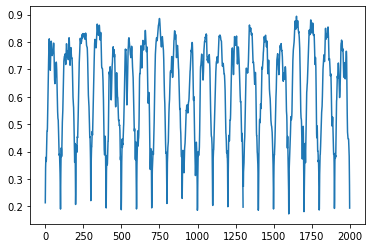

In [50]:
arr

In [51]:
from sklearn.cluster import KMeans

In [72]:
km = KMeans(n_clusters=3)

In [73]:
np.sum(np.isnan(arr))

0

In [74]:
from sklearn.impute import SimpleImputer

In [75]:
imputer = SimpleImputer()

In [76]:
arr = imputer.fit_transform(arr)

In [77]:
np.sum(np.isnan(arr))

0

In [78]:
km.fit(arr)

KMeans(n_clusters=3)

In [79]:
km.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
arr0 = arr[km.labels_ == 0]

In [67]:
arr1 = arr[km.labels_ == 1]

In [80]:
arr2 = arr[km.labels_ == 2]

In [81]:
arr0.shape

(58, 2000)

In [82]:
arr1.shape

(19, 2000)

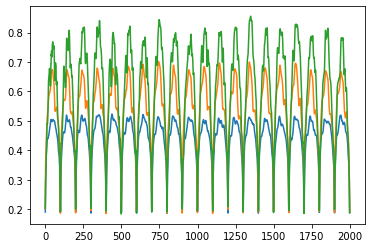

In [84]:
plt.plot(np.mean(arr0, 0))
plt.plot(np.mean(arr1, 0))
plt.plot(np.mean(arr2, 0))